In [1]:
import pandas as pd

# Data Loading
df = pd.read_csv('Thyroid Disease.csv')

In [2]:
from sklearn.impute import SimpleImputer

# Handling missing values
imputer = SimpleImputer(strategy='mean')

In [3]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Encoding categorical variables
label_encoder = LabelEncoder()

In [4]:
import numpy as np

# Handle non-numeric data
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = label_encoder.fit_transform(df[column].astype(str))

df_cleaned = imputer.fit_transform(df)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif

# Feature Selection
X = df_cleaned[:, :-2]  # Features, excluding Stage and Response
y = df_cleaned[:, -1]   # Response variable

selector = SelectKBest(score_func=f_classif, k=10)
X_selected = selector.fit_transform(X, y)

# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Data Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
y_prob = knn.predict_proba(X_test)[:, 1]
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))

KNN Accuracy: 0.8571428571428571


In [7]:
print("Confusion Matrix for KNN:")

Confusion Matrix for KNN:


In [8]:
print(confusion_matrix(y_test, y_pred_knn))

[[57  1]
 [10  9]]


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve

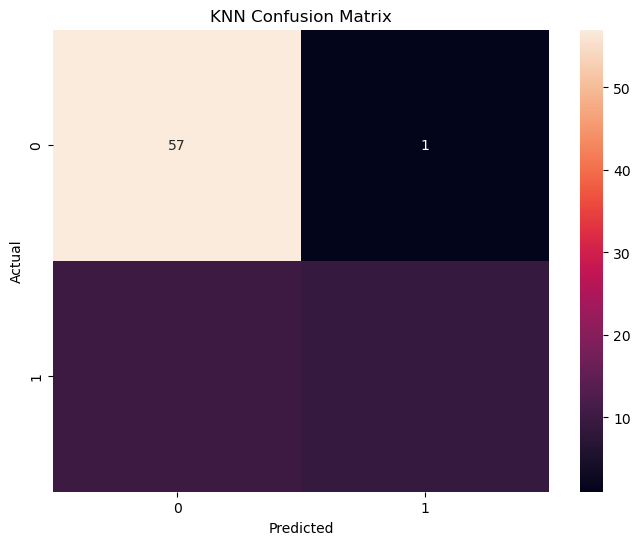

In [10]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_knn)
sns.set_palette("OrRd")
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

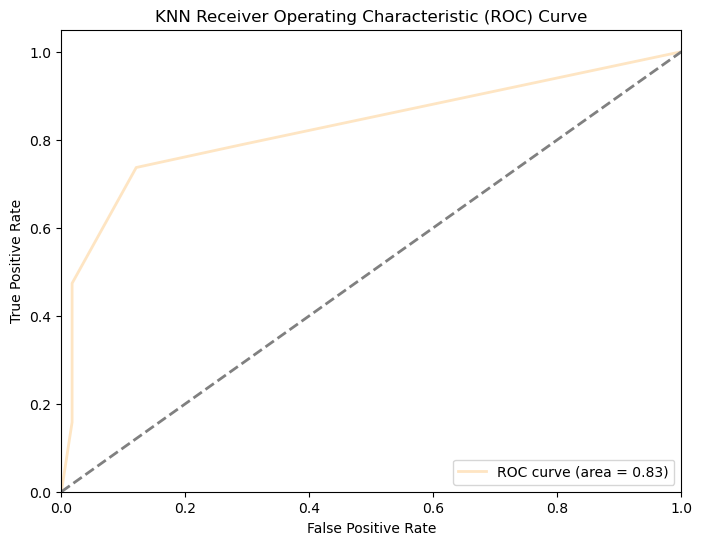

In [11]:
# ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
sns.set_palette("OrRd")
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr,  lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

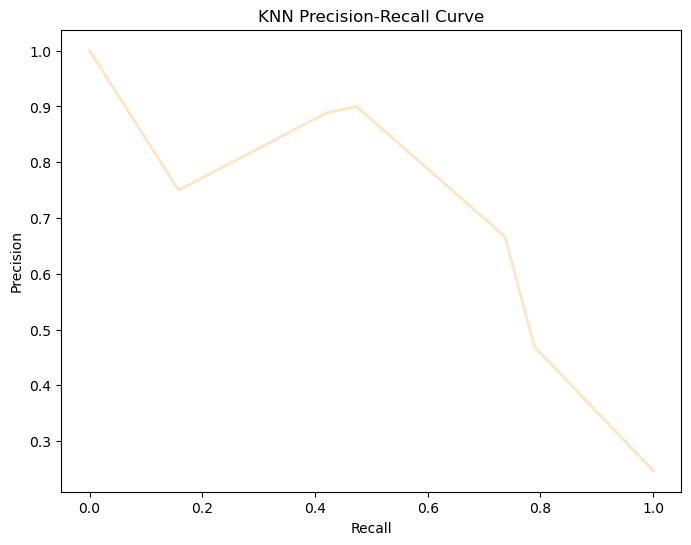

In [12]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
sns.set_palette("OrRd")
plt.plot(recall, precision, lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('KNN Precision-Recall Curve')
plt.show()